**Denoising by AEs**

In [1]:
###Add python library here####
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
figsize=(15, 6)
plt.style.use('fivethirtyeight')

**Loading dataset**

In [2]:
# Fashion-MNIST data loader

batch_size = 128
n_iters = 10000

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

train_dataset = dsets.FashionMNIST(root='./data',
                                   train=True,
                                   transform=img_transform,
                                   download=True)

test_dataset = dsets.FashionMNIST(root='./data',
                                  train=False,
                                  transform=img_transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

**Autoencoder architecture**

In [33]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        ###TODO###
        self.encoder = nn.Sequential(*[
                                       nn.Linear(28*28, 256),
                                       nn.ReLU(True),
                                       nn.Linear(256, 128),
                                       nn.Tanh()
                                       nn.Linear(128, 16),
                                       nn.Tanh()
        ])
        self.decoder = nn.Sequential(*[
                                       nn.Linear(16, 128),
                                       nn.Tanh()
                                       nn.Linear(128, 256),
                                       nn.Tanh(),
                                       nn.Linear(256, 28*28),
                                       nn.Sigmoid()
         ])

    def forward(self, x):
        y = self.encoder(x)
        z = self.decoder(y)
        return z
        ###TODO###  





class autoencoder_over(nn.Module):
    def __init__(self):
        super(autoencoder_over, self).__init__()
        ###TODO###
        self.encoder = nn.Sequential(*[
                                       nn.Linear(28*28, 128),
                                       nn.ReLU(True),
                                       nn.Linear(128, 256),
                                       nn.ReLU(True),
                                       nn.Linear(256, 512),
                                       nn.ReLU(True)
                                       ])
        self.decoder = nn.Sequential(*[
                                       nn.Linear(512, 256),
                                       nn.ReLU(True),
                                       nn.Linear(256, 128),
                                       nn.ReLU(True),
                                       nn.Linear(128, 28*28),
                                       nn.Sigmoid()
                                       ])

    def forward(self, x):
        y = self.encoder(x)
        z = self.decoder(y)
        return z



**Evaluation**

In [37]:
####TODO
learning_rate= 0.0002
model = autoencoder()
criterion = nn.MSELoss()    #MSE as optimization criterion failed so I used nn.BCELoss() instead. But reported errors are MSE
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_()
        dropout = nn.Dropout(0.3)
        noisy_images = dropout(torch.ones(images.shape)) * images

        # ===================forward=====================
        output = model(noisy_images)
        loss = criterion(output, images.data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28*28).requires_grad_()
            dropout = nn.Dropout(0.3)
            noisy_images = dropout(torch.ones(images.shape)) * images

            # ===================forward=====================
            output = model(noisy_images)
            loss = criterion(output, images)
        # ===================log========================
        print('epoch [{}/{}], loss:{:.4f}      \\test'
            .format(epoch + 1, num_epochs, loss.item()))
    # Calculate MSE Test Loss
####TODO####

epoch [1/21], loss:0.6724
epoch [1/21], loss:0.7336      \test
epoch [2/21], loss:0.6388
epoch [3/21], loss:0.6481
epoch [4/21], loss:0.6190
epoch [5/21], loss:0.6167
epoch [6/21], loss:0.6109
epoch [7/21], loss:0.6298
epoch [8/21], loss:0.6139
epoch [9/21], loss:0.6251
epoch [10/21], loss:0.6131
epoch [11/21], loss:0.5906
epoch [11/21], loss:0.6917      \test
epoch [12/21], loss:0.6192
epoch [13/21], loss:0.5810
epoch [14/21], loss:0.5910
epoch [15/21], loss:0.6014
epoch [16/21], loss:0.6035
epoch [17/21], loss:0.6169
epoch [18/21], loss:0.5982
epoch [19/21], loss:0.6054
epoch [20/21], loss:0.5758
epoch [21/21], loss:0.5881
epoch [21/21], loss:0.6810      \test


### Overcomplete

In [38]:
####TODO
learning_rate= 0.0001
model = autoencoder_over()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_()
        dropout = nn.Dropout(0.5)
        noisy_images = dropout(torch.ones(images.shape)) * images

        # ===================forward=====================
        output = model(noisy_images)
        loss = criterion(output, images)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28*28).requires_grad_()
            dropout = nn.Dropout(0.5)
            noisy_images = dropout(torch.ones(images.shape)) * images

            # ===================forward=====================
            output = model(noisy_images)
            loss = criterion(output, images)
        # ===================log========================
        print('epoch [{}/{}], loss:{:.4f}      \\test'
            .format(epoch + 1, num_epochs, loss.item()))
    # Calculate MSE Test Loss
####TODO####

epoch [1/21], loss:0.6509
epoch [1/21], loss:0.7147      \test
epoch [2/21], loss:0.6221
epoch [3/21], loss:0.6193
epoch [4/21], loss:0.6011
epoch [5/21], loss:0.6225
epoch [6/21], loss:0.5963
epoch [7/21], loss:0.6271
epoch [8/21], loss:0.6348
epoch [9/21], loss:0.6125
epoch [10/21], loss:0.6268
epoch [11/21], loss:0.6037
epoch [11/21], loss:0.6900      \test
epoch [12/21], loss:0.6112
epoch [13/21], loss:0.5815
epoch [14/21], loss:0.5619
epoch [15/21], loss:0.5854
epoch [16/21], loss:0.5871
epoch [17/21], loss:0.6113
epoch [18/21], loss:0.6210
epoch [19/21], loss:0.5917
epoch [20/21], loss:0.5779
epoch [21/21], loss:0.5636
epoch [21/21], loss:0.6851      \test


### Comparing Undercomplete and Overcomplete
The results show that undercomplete is better.

### Regularization

In [39]:
learning_rate= 0.0001
model = autoencoder_over()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
factor = 0.00002 #lambda

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_()
        dropout = nn.Dropout(0.5)
        noisy_images = dropout(torch.ones(images.shape)) * images

        # ===================forward=====================
        reg_loss = 0
        for param in model.parameters():
            reg_loss += torch.norm(param, 1)

        output = model(noisy_images)
        loss = criterion(output, images)
        loss += factor * reg_loss

        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28*28).requires_grad_()
            dropout = nn.Dropout(0.5)
            noisy_images = dropout(torch.ones(images.shape)) * images

            # ===================forward=====================
            output = model(noisy_images)
            loss = criterion(output, images)
        # ===================log========================
        print('epoch [{}/{}], loss:{:.4f}      \\test'
            .format(epoch + 1, num_epochs, loss.item()))

epoch [1/21], loss:0.8071
epoch [1/21], loss:0.7273      \test
epoch [2/21], loss:0.7191
epoch [3/21], loss:0.6896
epoch [4/21], loss:0.7051
epoch [5/21], loss:0.6777
epoch [6/21], loss:0.6456
epoch [7/21], loss:0.6860
epoch [8/21], loss:0.6197
epoch [9/21], loss:0.6496
epoch [10/21], loss:0.6433
epoch [11/21], loss:0.6521
epoch [11/21], loss:0.7209      \test
epoch [12/21], loss:0.6409
epoch [13/21], loss:0.6807
epoch [14/21], loss:0.6432
epoch [15/21], loss:0.6568
epoch [16/21], loss:0.6299
epoch [17/21], loss:0.6576
epoch [18/21], loss:0.6425
epoch [19/21], loss:0.6534
epoch [20/21], loss:0.6603
epoch [21/21], loss:0.6611
epoch [21/21], loss:0.7198      \test


In [40]:
learning_rate= 0.0001
model = autoencoder_over()
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
factor = 0.00002 #lambda

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_()
        dropout = nn.Dropout(0.5)
        noisy_images = dropout(torch.ones(images.shape)) * images

        # ===================forward=====================
        reg_loss = 0
        for param in model.parameters():
            reg_loss += torch.norm(param, 2) ** 2

        output = model(noisy_images)
        loss = criterion(output, images)
        loss += factor * reg_loss

        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28*28).requires_grad_()
            dropout = nn.Dropout(0.5)
            noisy_images = dropout(torch.ones(images.shape)) * images

            # ===================forward=====================
            output = model(noisy_images)
            loss = criterion(output, images)
        # ===================log========================
        print('epoch [{}/{}], loss:{:.4f}      \\test'
            .format(epoch + 1, num_epochs, loss.item()))

epoch [1/21], loss:0.6561
epoch [1/21], loss:0.7140      \test
epoch [2/21], loss:0.6317
epoch [3/21], loss:0.6079
epoch [4/21], loss:0.6211
epoch [5/21], loss:0.6151
epoch [6/21], loss:0.6402
epoch [7/21], loss:0.6088
epoch [8/21], loss:0.6233
epoch [9/21], loss:0.6049
epoch [10/21], loss:0.6117
epoch [11/21], loss:0.6101
epoch [11/21], loss:0.6947      \test
epoch [12/21], loss:0.6054
epoch [13/21], loss:0.5857
epoch [14/21], loss:0.6135
epoch [15/21], loss:0.5920
epoch [16/21], loss:0.5998
epoch [17/21], loss:0.6122
epoch [18/21], loss:0.6096
epoch [19/21], loss:0.6138
epoch [20/21], loss:0.5961
epoch [21/21], loss:0.6047
epoch [21/21], loss:0.6931      \test


In [41]:
class autoencoder_over(nn.Module):
    def __init__(self):
        super(autoencoder_over, self).__init__()
        ###TODO###
        self.encoder = nn.Sequential(*[
                                       nn.Linear(28*28, 128),
                                       nn.ReLU(True),
                                       nn.Linear(128, 256),
                                       nn.ReLU(True),
                                       nn.Linear(256, 512),
                                       nn.Dropout(0.2),
                                       nn.ReLU(True)
                                       ])
        self.decoder = nn.Sequential(*[
                                       nn.Linear(512, 256),
                                       nn.ReLU(True),
                                       nn.Linear(256, 128),
                                       nn.Dropout(0.2),
                                       nn.ReLU(True),
                                       nn.Linear(128, 28*28),
                                       nn.Sigmoid()
                                       ])

    def forward(self, x):
        y = self.encoder(x)
        z = self.decoder(y)
        return z

In [42]:
####TODO
learning_rate= 0.0001
model = autoencoder_over()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28*28).requires_grad_()
        dropout = nn.Dropout(0.5)
        noisy_images = dropout(torch.ones(images.shape)) * images

        # ===================forward=====================
        output = model(noisy_images)
        loss = criterion(output, images)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28*28).requires_grad_()
            dropout = nn.Dropout(0.5)
            noisy_images = dropout(torch.ones(images.shape)) * images

            # ===================forward=====================
            output = model(noisy_images)
            loss = criterion(output, images)
        # ===================log========================
        print('epoch [{}/{}], loss:{:.4f}      \\test'
            .format(epoch + 1, num_epochs, loss.item()))
    # Calculate MSE Test Loss
####TODO####

epoch [1/21], loss:0.6525
epoch [1/21], loss:0.7266      \test
epoch [2/21], loss:0.6639
epoch [3/21], loss:0.6348
epoch [4/21], loss:0.6170
epoch [5/21], loss:0.6269
epoch [6/21], loss:0.6111
epoch [7/21], loss:0.6137
epoch [8/21], loss:0.5823
epoch [9/21], loss:0.6188
epoch [10/21], loss:0.6112
epoch [11/21], loss:0.6128
epoch [11/21], loss:0.6955      \test
epoch [12/21], loss:0.6113
epoch [13/21], loss:0.6144
epoch [14/21], loss:0.6331
epoch [15/21], loss:0.6159
epoch [16/21], loss:0.5711
epoch [17/21], loss:0.6169
epoch [18/21], loss:0.6216
epoch [19/21], loss:0.6061
epoch [20/21], loss:0.5970
epoch [21/21], loss:0.5905
epoch [21/21], loss:0.6904      \test


Above results show that Dropout has the best effect on the network.(According to TEST loss)

Note that train losses shouldn't be compared because they're from different functions.


NOTE: add your explanation after each part 

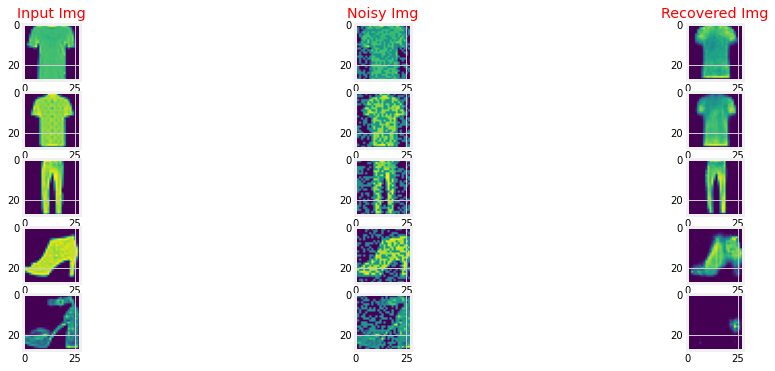

In [48]:
###Now compare the noisy and denoised version of the Fasiohn MNIST(visually)###
####TODO
m = 5
for data in train_loader:
    img, _ = data
    images = img.view(-1, 28*28)
    dropout = nn.Dropout(0.4)
    noisy_images = dropout(torch.ones(images.shape)) * images
    #noisy_images = torch.tensor(np.random.normal(0,0.2, images.shape)).float() + images
    # ===================forward=====================
    output = model(noisy_images)
    fig = plt.figure(figsize=figsize)
    for i in range(m):
        fig.add_subplot(m, 3, (i+1) * 3 - 2)
        plt.imshow(images[i].view(28, 28))
        if i == 0:
            plt.title("Input Img", color="red")
        fig.add_subplot(m, 3, (i+1) * 3 - 1)
        plt.imshow(noisy_images[i].view(28, 28).detach())
        if i == 0:
            plt.title("Noisy Img", color="red")
        fig.add_subplot(m, 3, (i+1) * 3)
        plt.imshow(output[i].view(28, 28).detach())
        if i == 0:
            plt.title("Recovered Img", color="red")
    break
        